<a href="https://colab.research.google.com/github/FauziArifin/PacktData/blob/master/Term_Deposits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Term Deposits Plan**


---

The marketing head of the bank where you are a data scientist approaches you with a problem they would like to be addressed. The marketing team recently completed a marketing campaign where they have collated a lot of information on existing customers. They require your help to identify which of these customers are likely to buy a term deposit plan


**Binary Classification**


---
Classification problems are the most prevalent use cases you will encounter in the real world. Unlike regression problems, where a real numbered value is predicted, classification problems deal with associating an example to a category.


In [0]:
import pandas as pd
import numpy as np

In [0]:
dataset_url = 'https://raw.githubusercontent.com/FauziArifin/PacktData/master/Dataset/term_deposit_dataset.csv'
df_bank = pd.read_csv(dataset_url, sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#print the shape of the data
print(df_bank.shape)

(45211, 17)


In [5]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df_bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
df_bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [10]:
df_bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

**Exploratory Data Analysis**



In [0]:
import matplotlib.pyplot as plt
import altair as alt

In [0]:
filter_mask = df_bank['y'] == 'yes'
bankSub1 = df_bank[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [13]:
#visualize the relationship using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [14]:
#getting another perspective
ageTot = df_bank.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129
...,...,...
72,90,2
73,92,2
74,93,2
75,94,1


In [15]:
# Getting all the details in one place
ageProp = df_bank.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [16]:
#Merge both data frames
ageComb = pd.merge(ageProp, ageTot, left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [17]:
#display the proportion
chart_ageComb = alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')
chart_ageComb

alt.FacetChart(...)

In [18]:
#total counts under each job category
jobTot = df_bank.groupby('job')['y'].agg(jobTot = 'count').reset_index()
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [21]:
#more detail
jobProp = df_bank.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()
jobProp

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [22]:
#Merge both data frames
jobComb = pd.merge(jobProp, jobTot, on=['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100

jobComb.head()

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


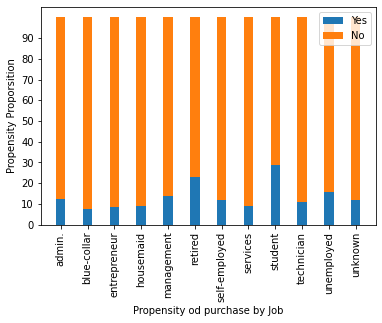

In [30]:
#Visualize with Stacked Bar
#import matplotlib
import matplotlib.pyplot as plt

#create separate for yes and no
jobCombYes = jobComb[jobComb['y'] == 'yes']
jobCombNo = jobComb[jobComb['y'] == 'no']

#length of the x_axis labels
xlabels = jobTot['job'].nunique()

#proportion value
jobYes = jobCombYes['catProp'].unique()
jobNo = jobCombNo['catProp'].unique()

#arrange the index of x axis
ind = np.arange(xlabels)

#width of each bar
width = 0.35

#plotting
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom = jobYes)

plt.ylabel('Propensity Proporsition')
plt.xlabel('Propensity od purchase by Job')

#Defining the x and y label index
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

#Defining legend
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

#to rotate the axis labels
plt.xticks(rotation=90)
plt.show()

**Feature Engineering**

In [31]:
#Relationship between housing and propensity from term deposits
df_bank.groupby(['housing', 'y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


The first part of the code is to group customers based on whether they own a house or not. The count of customers under each category is calculated with the .agg() method. From the values, we can see that the propensity to buy term deposits is much higher for people who do not own a house compared with those who do own one: ( 3354 / ( 3354 + 16727) = 17% to 1935 / ( 1935 + 23195) = 8%).

In [32]:
#Relationship between having a loan and propensity for term deposits
df_bank.groupby(['loan', 'y'])['y'].agg(loanTot = 'count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In the case of loan portfolios, the propensity to buy term deposits is higher for customers without loans: ( 4805 / ( 4805 + 33162) = 12 % to 484/ ( 484 + 6760) = 6%).


---

Housing and loans were categorical data and finding a relationship was straightforward. However, bank balance data is numerical and to analyze it, we need to have a different strategy. One common strategy is to convert the continuous numerical data into ordinal data and look at how the propensity varies across each category.

In [35]:
#quantile
np.quantile(df_bank['balance'], [0.25, 0.5, 0.75])

array([  72.,  448., 1428.])

In [0]:
#Create new features for bank data based on the quantile values
df_bank['balanceClass'] = 'Quant1'
df_bank.loc[(df_bank['balance'] > 72) & (df_bank['balance'] < 448), 'balanceClass'] = 'Quant2'
df_bank.loc[(df_bank['balance'] > 448) & (df_bank['balance'] < 1428), 'balanceClass'] = 'Quant3'
df_bank.loc[(df_bank['balance'] > 1428), 'balanceClass'] = 'Quant4'


In [37]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [41]:
#Calculate the customers under each quantile
balanceTot = df_bank.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [42]:
#Calculate the total customers categorized as per quantile and propensity
balanceProp = df_bank.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [43]:
#Merge data frames
balanceComb = pd.merge(balanceProp, balanceTot, on=['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot)*100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


From the distribution of data, we can see that, as we move from Quantile 1 to Quantile 4, the proportion of customers who buy term deposits keeps on increasing. For instance, of all of the customers who belong to Quant 1, 7.25% have bought term deposits (we get this percentage from catProp). This proportion increases to 10.87 % for Quant 2 and thereafter to 12.52 % and 16.15% for Quant 3 and Quant4, respectively. From this trend, we can conclude that individuals with higher balances have more propensity for term deposits.

In [45]:
#Normalize data
from sklearn import preprocessing
x = df_bank[['balance']].values.astype(float)

#Create the scaling function
minmaxScaler = preprocessing.MinMaxScaler()

#transforming the balance data
df_bank['balanceTran'] = minmaxScaler.fit_transform(x)

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072812


The purpose of normalization is to bring all of the variables that we are using to create the new feature into a common scale. One effective method we can use here for the normalizing function is called MinMaxScaler(), which converts all of the numerical data between a scaled range of 0 to 1

In [0]:
#add a small value of 0.001 so as to eliminate the 0 values in the variable
df_bank['balanceTran'] = df_bank['balanceTran'] + 0.00001

In [47]:
#transform values for loan data
#set default loanTran = 1
df_bank['loanTran'] = 1

#giving weight of 5 if there is no loan
df_bank.loc[df_bank['loan'] == 'no', 'loanTran'] = 5
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


The value of 1 and 5 are intuitive weights. What values that is assign can be vary based on the business context you may be provided with.

In [48]:
#transform value for house
df_bank['houseTran'] = 5
df_bank.loc[df_bank['housing'] == 'no', 'houseTran'] = 1
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


In [50]:
#Crate new variable which is a product of all these
df_bank['assetIndex'] = df_bank['balanceTran'] * df_bank['loanTran'] * df_bank['houseTran']
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


In [55]:
# Finding the quantile
np.quantile(df_bank['assetIndex'],[0.25,0.5,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [56]:
# Creating quantiles from the assetindex data
df_bank['assetClass'] = 'Quant1'

df_bank.loc[(df_bank['assetIndex'] > 0.3768) & (df_bank['assetIndex'] < 0.5692), 'assetClass'] = 'Quant2'

df_bank.loc[(df_bank['assetIndex'] > 0.5692) & (df_bank['assetIndex'] < 1.9027), 'assetClass'] = 'Quant3'

df_bank.loc[df_bank['assetIndex'] > 1.9027, 'assetClass'] = 'Quant4'

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [0]:
#Calculate total of each assetClass
assetTot = df_bank.groupby('assetClass')['y'].agg(assetTot = 'count').reset_index()

#Calculate Proportion
assetProp = df_bank.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()


In [61]:
#Merge both data frames
assetComb = pd.merge(assetProp, assetTot, on=['assetClass'])
assetComb['catProp'] = (assetComb.assetCat/assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10187,11330,89.911739
1,Quant1,yes,1143,11330,10.088261
2,Quant2,no,9162,11274,81.266631
3,Quant2,yes,2112,11274,18.733369
4,Quant3,no,10316,11300,91.292035
5,Quant3,yes,984,11300,8.707965
6,Quant4,no,10257,11307,90.713717
7,Quant4,yes,1050,11307,9.286283


Since Quant2 has the highest proportion of customers who have bought term deposits, we can conclude that customers in Quant2 have higher propensity to purchase the term deposits than all other customers.

In [0]:
from pandas import set_option

In [0]:
bankNumeric = df_bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [64]:
set_option('display.width', 150)
set_option('precision', 3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


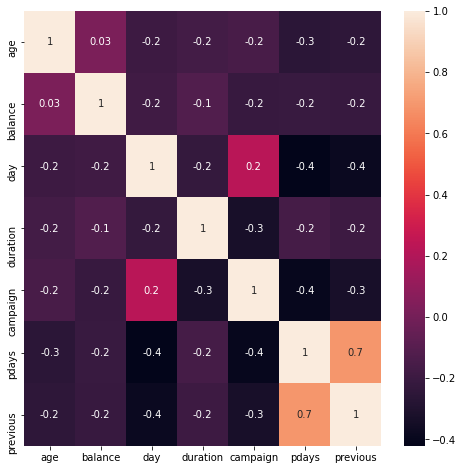

In [68]:
# Plotting the correlation matrix
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(bankCorr.corr(), annot = True, fmt='.1g', ax=ax)

In [69]:
bankNumeric.skew()

age          0.685
balance      8.360
day          0.093
duration     3.144
campaign     4.899
pdays        2.616
previous    41.846
dtype: float64